<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-7 </h1> </html>

## LSTM (Long Short-Term Memory)

## GOLD-2022 dataset 
     
### Predictions of The Highest & Lowest prices DURING five(5) following minutes
- Early-Stopping
- Loss function: MSE

### length of analysed history (sliding window)- 50 minutes ago

#### dataset for training: 30.000 rows (minutes) ~ 1 month
#### train / test = 90 /10

___________________________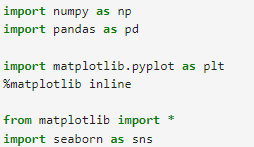

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import*
import seaborn as sns

In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


_____________________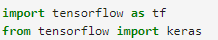

In [3]:
import tensorflow as tf
from tensorflow import keras

__________________

In [4]:
print(tf.__version__)


2.18.0


_____________________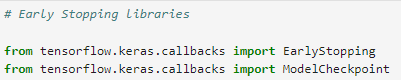

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

___________________

In [6]:
np.random.seed(19)

<html> <h2 style=" color:blue;"> Data </h2> </html>

In [7]:
# We use a slightly different normalisation principle for prices.
# We use the same principle as in the practical session in Week-6 for Volumes and Deltas.

# For normalisation, it is not necessary for the normalised columns' values to be in the range between [0,1].
# What is more important is that all the values ​​in these columns are approximately the same order of magnitude, 
# i.e. do not differ by hundreds or more times.

_____________________________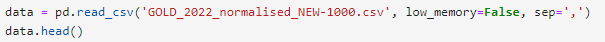

In [8]:
data = pd.read_csv('GOLD_2022_normalised_NEW-1000.csv', low_memory=False, sep=',')
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,1.828604,1.829628,1.828544,1.829504,0.009718,1.829656,1.830936,1.829386,1.830196,0.009050,0.629054,0.000709,0.751830,0.691381,0.801417,0.836836,1.0,1.0,1.829628,1.829386
1,1.829504,1.830104,1.829398,1.830004,0.007151,1.829936,1.830676,1.829916,1.830632,0.009946,0.631369,0.002969,0.898229,0.865171,0.877922,0.851948,0.0,0.0,1.830104,1.829916
2,1.830098,1.830604,1.829998,1.830534,0.011126,1.830612,1.831226,1.830516,1.831146,0.016555,0.633130,0.005766,0.878867,0.853365,0.877922,0.855726,0.0,0.0,1.830604,1.830516
3,1.830534,1.830704,1.830504,1.830674,0.001991,1.831156,1.831306,1.831046,1.831046,0.006808,0.632720,0.005116,0.853365,0.858087,0.872255,0.912397,0.0,0.0,1.830704,1.831046
4,1.830674,1.830674,1.830448,1.830508,0.006660,1.831026,1.831181,1.830886,1.831086,0.010739,0.632227,0.004332,0.917119,0.880520,0.896812,0.863754,0.0,0.0,1.830674,1.830886


_____________________________

In [9]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
5675,1.790818,1.790948,1.790768,1.790908,0.013394,1.791175,1.791315,1.791125,1.791305,0.005735,0.624379,0.008135,0.915939,0.913577,0.915939,0.906493,0.0,0.0,1.790948,1.791125
5676,1.790908,1.791058,1.790808,1.791058,0.011934,1.791285,1.791485,1.791192,1.791485,0.005167,0.624976,0.007188,0.911216,0.899410,0.909563,0.899410,0.0,0.0,1.791058,1.791192
5677,1.791068,1.791098,1.790998,1.791028,0.008770,1.791485,1.791505,1.791395,1.791445,0.006572,0.628031,0.002334,0.901771,0.904132,0.906493,0.901771,0.0,0.0,1.791098,1.791395
5678,1.791018,1.791068,1.790998,1.791008,0.005919,1.791445,1.791482,1.791402,1.791422,0.004820,0.628765,0.001167,0.899410,0.902479,0.904841,0.902479,0.0,0.0,1.791068,1.791402
5679,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___________________________

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          5680 non-null   float64
 1   High_Bid          5679 non-null   float64
 2   Low_Bid           5679 non-null   float64
 3   Close_Bid         5679 non-null   float64
 4   Volume_Bid        5679 non-null   float64
 5   Open_Ask          5679 non-null   float64
 6   High_Ask          5679 non-null   float64
 7   Low_Ask           5679 non-null   float64
 8   Close_Ask         5679 non-null   float64
 9   Volume_Ask        5679 non-null   float64
 10  Volume_Delta      5679 non-null   float64
 11  Volume_Delta_abs  5679 non-null   float64
 12  Open_Delta        5679 non-null   float64
 13  High_Delta        5679 non-null   float64
 14  Low_Delta         5679 non-null   float64
 15  Close_Delta       5679 non-null   float64
 16  New_day           5679 non-null   float64


#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [11]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask', 
                'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



_____________________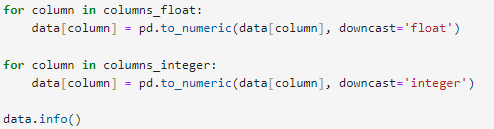

In [12]:
for column in columns_float:
    data[column] = pd.to_numeric(data[column], downcast='float')

for column in columns_integer:
    data[column] = pd.to_numeric(data[column], downcast='integer')
    
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          5680 non-null   float32
 1   High_Bid          5679 non-null   float32
 2   Low_Bid           5679 non-null   float32
 3   Close_Bid         5679 non-null   float32
 4   Volume_Bid        5679 non-null   float32
 5   Open_Ask          5679 non-null   float32
 6   High_Ask          5679 non-null   float32
 7   Low_Ask           5679 non-null   float32
 8   Close_Ask         5679 non-null   float32
 9   Volume_Ask        5679 non-null   float32
 10  Volume_Delta      5679 non-null   float32
 11  Volume_Delta_abs  5679 non-null   float32
 12  Open_Delta        5679 non-null   float32
 13  High_Delta        5679 non-null   float32
 14  Low_Delta         5679 non-null   float32
 15  Close_Delta       5679 non-null   float32
 16  New_day           5679 non-null   float64


_____________________________

In [13]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
count,5680.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000
mean,1.809284,1.809634,1.809208,1.809421,0.010934,1.809778,1.809985,1.809559,1.809772,0.010992,0.629539,0.003984,0.917417,0.917557,0.917381,0.917158,0.000880,0.000176,1.809634,1.809559
std,0.015600,0.011289,0.011339,0.011315,0.008804,0.011318,0.011293,0.011343,0.011318,0.008484,0.003519,0.003922,0.014223,0.012596,0.012021,0.012301,0.029662,0.013270,0.011289,0.011343
min,1.000000,1.786738,1.786288,1.786458,0.000092,1.786782,1.787025,1.786592,1.786805,0.000074,0.591459,0.000000,0.539315,0.691381,0.730579,0.779693,0.000000,0.000000,1.786738,1.786592
25%,1.802106,1.802358,1.801823,1.802077,0.005065,1.802442,1.802684,1.802176,1.802442,0.005080,0.627782,0.001253,0.910508,0.910980,0.910980,0.909563,0.000000,0.000000,1.802358,1.802176
50%,1.809043,1.809224,1.808844,1.809048,0.008257,1.809422,1.809592,1.809202,1.809432,0.008405,0.629522,0.002871,0.916647,0.918064,0.916647,0.916647,0.000000,0.000000,1.809224,1.809202
75%,1.817445,1.817731,1.817163,1.817446,0.013708,1.817792,1.818059,1.817492,1.817762,0.014324,0.631391,0.005507,0.925148,0.923967,0.923731,0.923731,0.000000,0.000000,1.817731,1.817492
max,1.831544,1.831624,1.831319,1.831584,0.074359,1.831916,1.832076,1.831692,1.831956,0.057701,0.649088,0.060430,0.976151,0.976151,0.972845,0.971429,1.000000,1.000000,1.831624,1.831692


_____________________________

In [14]:
data.shape

(5680, 20)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

<Figure size 1200x500 with 0 Axes>

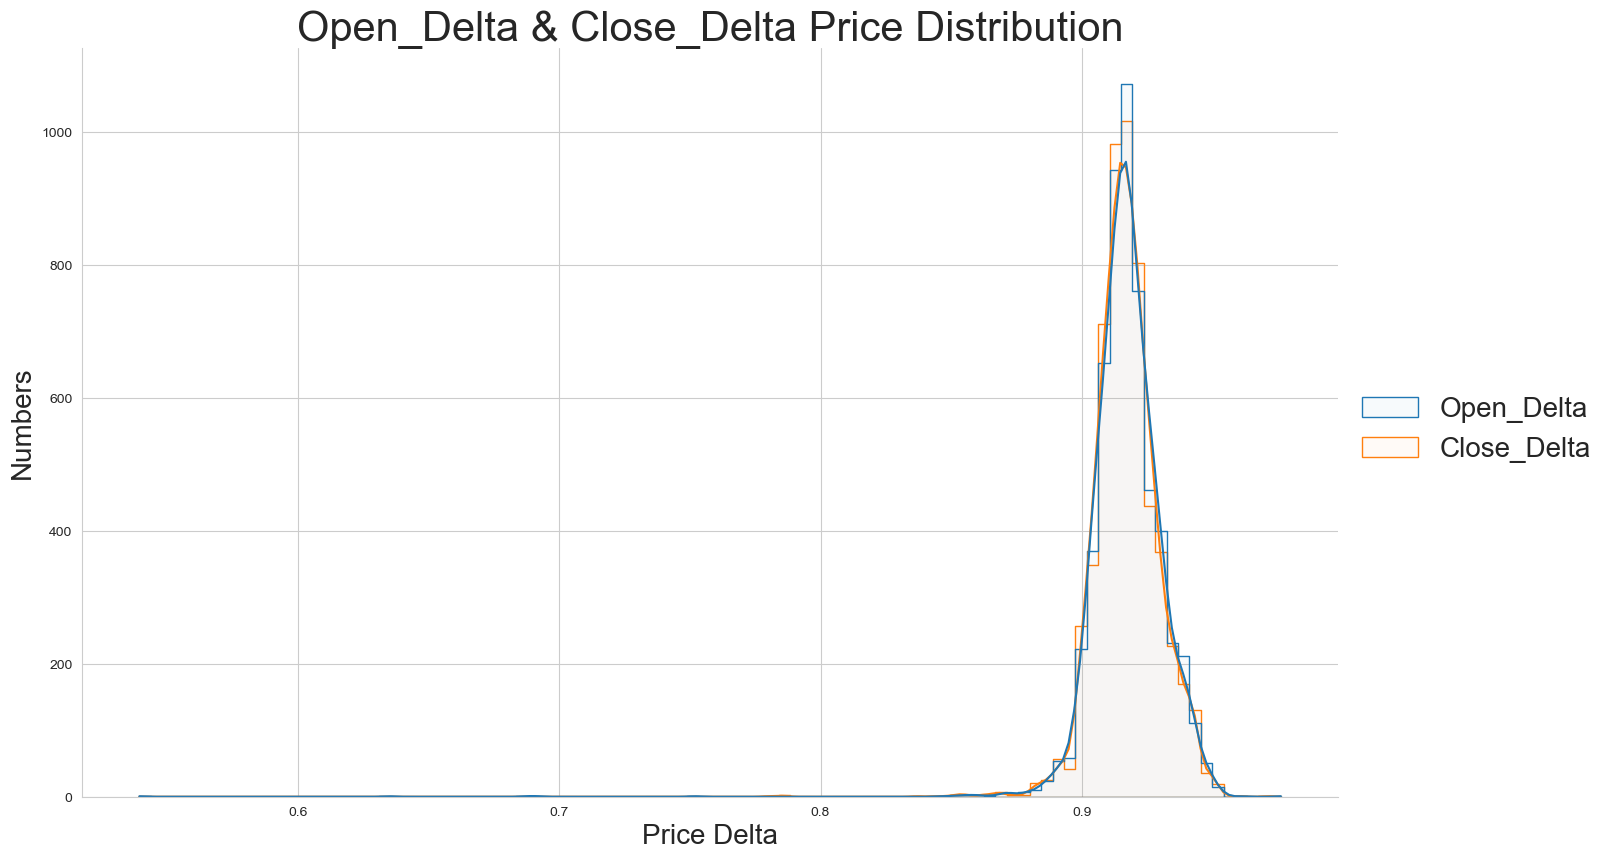

In [15]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

<html> <h3 style="font-style:italic; color:blue;"> Date Transformation </h3> </html>

In [16]:
# We will predict the Highest and Lowest prices DURING the next 5 minutes. 

# To do this in the data output (vector of answers), we shift prices sequentially to 5 minutes up, 
# and find max and min prices during these 5 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 5 minutes. 
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

_________________________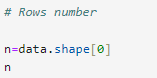

In [17]:
n=data.shape[0]
n

5680

_________________________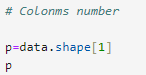

In [18]:
p=data.shape[1]
p

20

__________________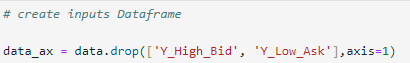

In [19]:
data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'],axis=1)

________________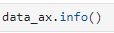

In [20]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          5680 non-null   float32
 1   High_Bid          5679 non-null   float32
 2   Low_Bid           5679 non-null   float32
 3   Close_Bid         5679 non-null   float32
 4   Volume_Bid        5679 non-null   float32
 5   Open_Ask          5679 non-null   float32
 6   High_Ask          5679 non-null   float32
 7   Low_Ask           5679 non-null   float32
 8   Close_Ask         5679 non-null   float32
 9   Volume_Ask        5679 non-null   float32
 10  Volume_Delta      5679 non-null   float32
 11  Volume_Delta_abs  5679 non-null   float32
 12  Open_Delta        5679 non-null   float32
 13  High_Delta        5679 non-null   float32
 14  Low_Delta         5679 non-null   float32
 15  Close_Delta       5679 non-null   float32
 16  New_day           5679 non-null   float64


__________________________

In [21]:
data_ax.shape

(5680, 18)

__________________________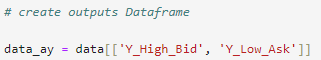

In [22]:
data_ay = data[['Y_High_Bid', 'Y_Low_Ask']]

________________

In [23]:
data_ay.shape

(5680, 2)

___________________

In [24]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,1.829628,1.829386
1,1.830104,1.829916
2,1.830604,1.830516
3,1.830704,1.831046
4,1.830674,1.830886
5,1.830568,1.830046


_________________________

In [25]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
5670,1.791028,1.791132
5671,1.791138,1.791145
5672,1.791018,1.790955
5673,1.790818,1.790995
5674,1.790948,1.791025
5675,1.790948,1.791125
5676,1.791058,1.791192
5677,1.791098,1.791395
5678,1.791068,1.791402
5679,NaN,NaN


______________________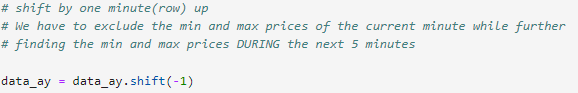

In [26]:
data_ay = data.shift(-1)

____________________

In [27]:
data_ay.head(6)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,1.829504,1.830104,1.829398,1.830004,0.007151,1.829936,1.830676,1.829916,1.830632,0.009946,0.631369,0.002969,0.898229,0.865171,0.877922,0.851948,0.0,0.0,1.830104,1.829916
1,1.830098,1.830604,1.829998,1.830534,0.011126,1.830612,1.831226,1.830516,1.831146,0.016555,0.633130,0.005766,0.878867,0.853365,0.877922,0.855726,0.0,0.0,1.830604,1.830516
2,1.830534,1.830704,1.830504,1.830674,0.001991,1.831156,1.831306,1.831046,1.831046,0.006808,0.632720,0.005116,0.853365,0.858087,0.872255,0.912397,0.0,0.0,1.830704,1.831046
3,1.830674,1.830674,1.830448,1.830508,0.006660,1.831026,1.831181,1.830886,1.831086,0.010739,0.632227,0.004332,0.917119,0.880520,0.896812,0.863754,0.0,0.0,1.830674,1.830886
4,1.830508,1.830568,1.829584,1.829744,0.004145,1.830966,1.831096,1.830046,1.830136,0.009128,0.632831,0.005292,0.892090,0.875561,0.891145,0.907674,0.0,0.0,1.830568,1.830046
5,1.829744,1.830244,1.829614,1.829938,0.007697,1.830076,1.830566,1.830076,1.830436,0.006070,0.628413,0.001727,0.921842,0.924203,0.891145,0.882645,0.0,0.0,1.830244,1.830076


____________________

In [28]:
data_ay.tail(10)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
5670,1.791018,1.791138,1.790918,1.791058,0.004757,1.791245,1.791422,1.791145,1.791345,0.003780,0.628847,0.001038,0.946635,0.933176,0.946635,0.932468,0.0,0.0,1.791138,1.791145
5671,1.791018,1.791018,1.790588,1.790688,0.007357,1.791345,1.791345,1.790955,1.791075,0.004333,0.627478,0.003212,0.923022,0.923022,0.913577,0.908855,0.0,0.0,1.791018,1.790955
5672,1.790685,1.790818,1.790685,1.790698,0.013660,1.791075,1.791225,1.790995,1.791095,0.007498,0.625380,0.006545,0.908146,0.904132,0.927037,0.906493,0.0,0.0,1.790818,1.790995
5673,1.790648,1.790948,1.790648,1.790818,0.010783,1.791032,1.791325,1.791025,1.791222,0.004241,0.625126,0.006949,0.909563,0.911216,0.911216,0.904841,0.0,0.0,1.790948,1.791025
5674,1.790818,1.790948,1.790768,1.790908,0.013394,1.791175,1.791315,1.791125,1.791305,0.005735,0.624379,0.008135,0.915939,0.913577,0.915939,0.906493,0.0,0.0,1.790948,1.791125
5675,1.790908,1.791058,1.790808,1.791058,0.011934,1.791285,1.791485,1.791192,1.791485,0.005167,0.624976,0.007188,0.911216,0.899410,0.909563,0.899410,0.0,0.0,1.791058,1.791192
5676,1.791068,1.791098,1.790998,1.791028,0.008770,1.791485,1.791505,1.791395,1.791445,0.006572,0.628031,0.002334,0.901771,0.904132,0.906493,0.901771,0.0,0.0,1.791098,1.791395
5677,1.791018,1.791068,1.790998,1.791008,0.005919,1.791445,1.791482,1.791402,1.791422,0.004820,0.628765,0.001167,0.899410,0.902479,0.904841,0.902479,0.0,0.0,1.791068,1.791402
5678,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [29]:
# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

___________________

In [30]:
data_ay.head(6)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
0,1.829504,1.830104,1.829398,1.830004,0.007151,1.829936,1.830676,1.829916,1.830632,0.009946,...,0.898229,0.865171,0.877922,0.851948,0.0,0.0,1.830104,1.829916,1.830704,1.829916
1,1.830098,1.830604,1.829998,1.830534,0.011126,1.830612,1.831226,1.830516,1.831146,0.016555,...,0.878867,0.853365,0.877922,0.855726,0.0,0.0,1.830604,1.830516,1.830704,1.830046
2,1.830534,1.830704,1.830504,1.830674,0.001991,1.831156,1.831306,1.831046,1.831046,0.006808,...,0.853365,0.858087,0.872255,0.912397,0.0,0.0,1.830704,1.831046,1.830704,1.829896
3,1.830674,1.830674,1.830448,1.830508,0.006660,1.831026,1.831181,1.830886,1.831086,0.010739,...,0.917119,0.880520,0.896812,0.863754,0.0,0.0,1.830674,1.830886,1.830968,1.829896
4,1.830508,1.830568,1.829584,1.829744,0.004145,1.830966,1.831096,1.830046,1.830136,0.009128,...,0.892090,0.875561,0.891145,0.907674,0.0,0.0,1.830568,1.830046,1.831624,1.829896
5,1.829744,1.830244,1.829614,1.829938,0.007697,1.830076,1.830566,1.830076,1.830436,0.006070,...,0.921842,0.924203,0.891145,0.882645,0.0,0.0,1.830244,1.830076,1.831624,1.829896


_______________________

In [31]:
data_ay.tail(10)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
5670,1.791018,1.791138,1.790918,1.791058,0.004757,1.791245,1.791422,1.791145,1.791345,0.003780,...,0.946635,0.933176,0.946635,0.932468,0.0,0.0,1.791138,1.791145,1.791138,1.790955
5671,1.791018,1.791018,1.790588,1.790688,0.007357,1.791345,1.791345,1.790955,1.791075,0.004333,...,0.923022,0.923022,0.913577,0.908855,0.0,0.0,1.791018,1.790955,1.791058,1.790955
5672,1.790685,1.790818,1.790685,1.790698,0.013660,1.791075,1.791225,1.790995,1.791095,0.007498,...,0.908146,0.904132,0.927037,0.906493,0.0,0.0,1.790818,1.790995,1.791098,1.790995
5673,1.790648,1.790948,1.790648,1.790818,0.010783,1.791032,1.791325,1.791025,1.791222,0.004241,...,0.909563,0.911216,0.911216,0.904841,0.0,0.0,1.790948,1.791025,1.791098,1.791025
5674,1.790818,1.790948,1.790768,1.790908,0.013394,1.791175,1.791315,1.791125,1.791305,0.005735,...,0.915939,0.913577,0.915939,0.906493,0.0,0.0,1.790948,1.791125,NaN,NaN
5675,1.790908,1.791058,1.790808,1.791058,0.011934,1.791285,1.791485,1.791192,1.791485,0.005167,...,0.911216,0.899410,0.909563,0.899410,0.0,0.0,1.791058,1.791192,NaN,NaN
5676,1.791068,1.791098,1.790998,1.791028,0.008770,1.791485,1.791505,1.791395,1.791445,0.006572,...,0.901771,0.904132,0.906493,0.901771,0.0,0.0,1.791098,1.791395,NaN,NaN
5677,1.791018,1.791068,1.790998,1.791008,0.005919,1.791445,1.791482,1.791402,1.791422,0.004820,...,0.899410,0.902479,0.904841,0.902479,0.0,0.0,1.791068,1.791402,NaN,NaN
5678,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__________________________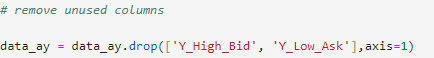

In [32]:
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'],axis=1)

____________________

In [33]:
data_ay.tail(6)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_5,Y_Low_Ask_5
5674,1.790818,1.790948,1.790768,1.790908,0.013394,1.791175,1.791315,1.791125,1.791305,0.005735,0.624379,0.008135,0.915939,0.913577,0.915939,0.906493,0.0,0.0,NaN,NaN
5675,1.790908,1.791058,1.790808,1.791058,0.011934,1.791285,1.791485,1.791192,1.791485,0.005167,0.624976,0.007188,0.911216,0.899410,0.909563,0.899410,0.0,0.0,NaN,NaN
5676,1.791068,1.791098,1.790998,1.791028,0.008770,1.791485,1.791505,1.791395,1.791445,0.006572,0.628031,0.002334,0.901771,0.904132,0.906493,0.901771,0.0,0.0,NaN,NaN
5677,1.791018,1.791068,1.790998,1.791008,0.005919,1.791445,1.791482,1.791402,1.791422,0.004820,0.628765,0.001167,0.899410,0.902479,0.904841,0.902479,0.0,0.0,NaN,NaN
5678,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [34]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 5 minutes)

for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)


In [35]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 5 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

_______________________

In [36]:
data_ay.shape

(5675, 20)

____________________

In [37]:
data_ax.shape

(5675, 18)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [38]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[1.8286e+00 1.8296e+00 1.8285e+00 1.8295e+00 9.7176e-03 1.8297e+00
  1.8309e+00 1.8294e+00 1.8302e+00 9.0501e-03 6.2905e-01 7.0896e-04
  7.5183e-01 6.9138e-01 8.0142e-01 8.3684e-01 1.0000e+00 1.0000e+00]
 [1.8295e+00 1.8301e+00 1.8294e+00 1.8300e+00 7.1508e-03 1.8299e+00
  1.8307e+00 1.8299e+00 1.8306e+00 9.9463e-03 6.3137e-01 2.9690e-03
  8.9823e-01 8.6517e-01 8.7792e-01 8.5195e-01 0.0000e+00 0.0000e+00]]


[[1.7907 1.7908 1.7907 1.7907 0.0137 1.7911 1.7912 1.791  1.7911 0.0075
  0.6254 0.0065 0.9081 0.9041 0.927  0.9065 0.     0.    ]
 [1.7906 1.7909 1.7906 1.7908 0.0108 1.791  1.7913 1.791  1.7912 0.0042
  0.6251 0.0069 0.9096 0.9112 0.9112 0.9048 0.     0.    ]]
numpy size: =  (5675, 18)
type:  float64


In [39]:
# Chech the result:
# Your result from running the cell above must match the result in this cell.

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [40]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[1.82950401 1.83010399 1.82939804 1.83000398 0.00715084 1.82993603
  1.83067608 1.829916   1.83063197 0.00994627 0.63136923 0.00296903
  0.89822906 0.86517119 0.87792206 0.85194802 0.         0.
  1.83070397 1.829916  ]
 [1.83009803 1.83060396 1.82999802 1.83053398 0.0111264  1.83061206
  1.83122599 1.83051598 1.831146   0.01655499 0.63312978 0.00576572
  0.87886661 0.85336483 0.87792206 0.85572606 0.         0.
  1.83070397 1.83004606]
 [1.83053398 1.83070397 1.83050394 1.83067405 0.00199147 1.83115602
  1.83130598 1.83104599 1.83104599 0.00680786 0.63272041 0.00511551
  0.85336483 0.85808736 0.87225503 0.91239667 0.         0.
  1.83070397 1.82989597]]


[[1.79068506 1.79081798 1.79068506 1.79069805 0.01365998 1.79107499
  1.79122496 1.790995   1.79109502 0.0074975  0.62538004 0.00654519
  0.90814638 0.90413225 0.92703658 0.90649348 0.         0.
  1.791098   1.790995  ]
 [1.79064798 1.79094803 1.79064798 1.79081798 0.01078342 1.79103196
  1.79132497 1.79102504 1.7912221  0.

In [41]:
# Chech the result:
# Your result from running the cell above must match the result in this cell.

<html> <h3 style="font-style:italic; color:blue;"> Create the 3D inputs tensor, and 2D outputs matrix </h3> </html>

In [42]:
# We will analyse only part of the dataset since training the neural network with 
# an entire dataset would require massive computer power.

# n_small = 30,000 rows (minutes), which equals around 1 month.

# We need a three-dimensional data tensor: [(n_small-N ), N, 18] and
# two-dimensional array of answers [(n_small-N ), 2] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2] with the High and Low prices shifted sequentially to 5 rows up.

________________________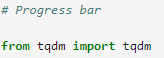

In [43]:
from tqdm import tqdm

___________________________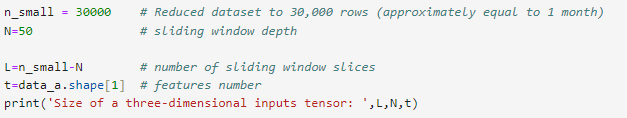

In [44]:
n_small = 30000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor:',L,N,t)

Size of a three-dimensional inputs tensor: 29950 50 18


#### Now just press 'CTRL' and 'ENTER' keys on the next 3 cells.

In [45]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 


In [46]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [47]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


 19%|█▉        | 5626/29950 [00:00<00:00, 130462.56it/s]


ValueError: could not broadcast input array from shape (49,18) into shape (50,18)

In [ ]:
from tqdm import tqdm

L = n_small - N - 5
for k in tqdm(range(L)):
    if data_a[k:k+N, :].shape[0] == N:  # Ensure slice is valid
        data_b[k, :, :] = data_a[k:k+N, :]
        Y[k, 0] = data_y[k+N-1, 0]   # max 5 minutes future price
        Y[k, 1] = data_y[k+N-1, 1]   # min 5 minutes future price

print("Final k:", k)
print("data_b shape:", data_b.shape)
print("Y shape:", Y.shape)


In [ ]:
# Chech the result:
# Your result from running the cell above must match the result in this cell.

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

In [ ]:
# Chech the result:
# Your result from running the cell above must match the result in this cell.

In [ ]:
# Each rows of Y above must have maximum of prices of 5 minute ahead

_________________________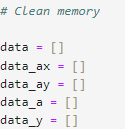

In [ ]:
data = []
data_ax = []
data_ay = []
data_a =[]
data_y = []

<html> <h2 style="font-style:italic; olor:blue;"> Train Test Split </h2> </html>

- 90% for training and validation
- 10% for testing

_________________________

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split


<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

________________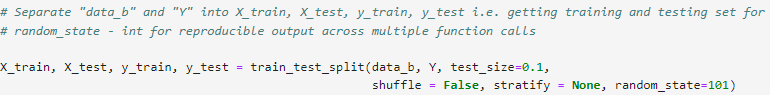

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1,
shuffle = False, stratify = None, random_state=101)

_____________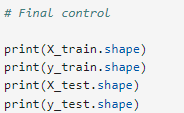

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<html> <h2 style="color:blue;"> Training </h2> </html>

<html> <h3 style="color:blue;"> LSTM </h3> </html>

___________________________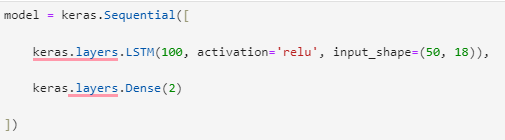

In [ ]:
model = keras. Sequential([

    keras.layers.LSTM(100, activation='relu', input_shape=(50, 18)),

    keras.layers.Dense(2)

]) 

_________________________

In [ ]:
print(model.summary())


<html> <h3 style="font-style:italic; color:blue;"> Callbacks </h3> </html>

__________________________

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])


#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

<html> <h4 style="font-style:bold; color:red;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell  </h4> </html>
<html> <h3 style="font-style:bold; color:blue;">
epochs=10
</h3> </html>


__________________________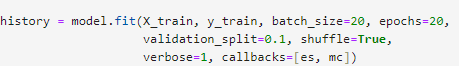

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20,
                    validation_split=0.1, shuffle=True,
                    verbose=1, callbacks=[es, mc])

_______________________________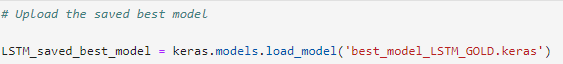

In [ ]:
LSTM_saved_best_model = keras.models. load_model('best_model_LSTM_GOLD.keras')


<html> <h3 style="font-style:italic; color:blue;"> Test </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next 4 cells.

In [ ]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

In [ ]:
scores

In [ ]:
print("Mean squared error (mse): %.9f " % (scores[0]))

In [ ]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

<html> <h2 style="font-style:italic; color:blue;"> Visualisation </h2> </html>

<html> <h3 style="font-style:italic; color:blue;"> MSE training graphs </h3> </html>

___________________________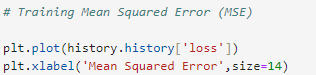

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error',size=14)
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

In [ ]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> MAE training graphs </h3> </html>

__________________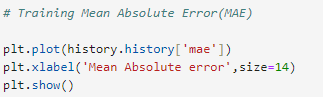

In [ ]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
plt.show()

____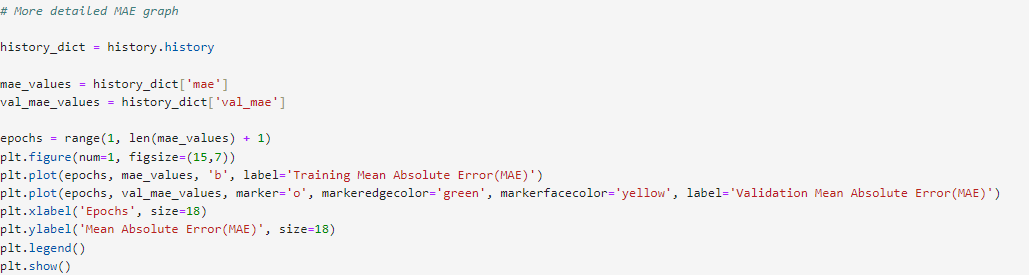

<html> <h3 style="font-style:italic; color:blue;"> Prediction 5 minute ahead </h3> </html>

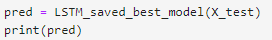

In [ ]:
pred = LSTM_saved_best_model(X_test)
print (pred)

<html> <h3 style="font-style:italic; color:blue;"> Price chart </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
N1=2500  # The first minute for the chart  
LL = 500  # Duration (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Prices', size=22)
plt.ylabel('GOLD Prices (thousands $)', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


<html> <h3 style="font-style:italic; color:blue;"> Error Chart </h3> </html>

__________________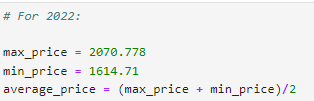

In [ ]:
max_price = 2070.778
min_price = 1614.71
average_price = (max_price + min_price)/2
average_price

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000
b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100


line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error GOLD price Chart', size=22)
plt.ylabel('Predicted Error GOLD Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Modify the practical session LSTM model parameter from 100 to be calculated using the formula: 

   ZY + 10
   , where your SID is: XXXXXZY
   
3) Change the epochs to 10.
4) Change the patience to 3
5) Leave other parameters the same as in the practical session.
6) Compile the model.
6) Train your LSTM with the same datasets and demonstrate the received test MSE & MAE.
Compare your test MSE & MAE with the MSE & MAE of the LSTM in the practical session.
7) Please only add to your Lab Logbook print-screens of:
- your LSTM architecture using model.summary(),
- the resulting test MSE & MAE and
- MAE detailed graph


    
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2037 - mae: 0.3721 - val_loss: 0.0970 - val_mae: 0.2651
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0852 - mae: 0.2477 - val_loss: 0.0940 - val_mae: 0.2640
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - mae: 0.2449 - val_loss: 0.0925 - val_mae: 0.2618
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0860 - mae: 0.2523 - val_loss: 0.0938 - val_mae: 0.2638
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0841 - mae: 0.2467 - val_loss: 0.0981 - val_mae: 0.2679
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0873 - mae: 0.2526 - val_loss: 0.0913 - val_mae: 0.2606
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0826 - mae: 0.2462 - val_loss: 0.0913 - val_mae: 0.2607
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0813 - mae: 0.2429 - val_loss: 0.0942 - val_mae: 0.2639
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0861 - m

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 93)             │        35,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            94 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,304 (415.25 KB)

 Trainable params: 35,434 (138.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,870 (276.84 KB)


Test MSE: 0.0897
Test MAE: 0.2581


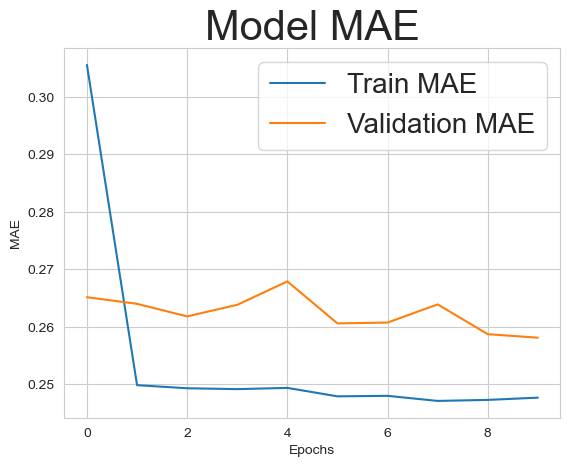

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_X, train_y = np.random.rand(1000, 10, 1), np.random.rand(1000, 1)
test_X, test_y = np.random.rand(200, 10, 1), np.random.rand(200, 1)

units = 83 + 10  # ZY + 10 = 93
epochs = 10
patience = 3

model = Sequential([
    LSTM(units, input_shape=(train_X.shape[1], train_X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), 
                    epochs=epochs, batch_size=32, callbacks=[early_stopping], verbose=1)

test_loss, test_mae = model.evaluate(test_X, test_y, verbose=0)

predictions = model.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)

print("LSTM Model Summary:")
model.summary()
print(f"\nTest MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
